# Austin Animal Center Data

### I. Data Preparation & Feature Engineering
In this section we merge the 2 available datasets, i.e., Austin_Animal_Center_Intakes.csv and Austin_Animal_Center_Outcomes.csv and do some data cleaning, feature engineering, and dimensionality reduction in the process. All rows containing a NaN value in in the `Outcome Type` column are dropped and duplicate columns are deleted. NaN values in the `Name` column are imputed with the string `'No Name'`. New columns called `Adoption`, `Month_x`, `Year_x`, `Month_y`, and `Year_y` are created.

In [1]:
# Standard library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
from datetime import timedelta

In [2]:
# Read csv files

df_in = pd.read_csv('./Austin_Animal_Center_Intakes.csv')
df_out = pd.read_csv('./Austin_Animal_Center_Outcomes.csv')

In [3]:
print(df_in.shape)
df_in.head()

(163643, 12)


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [4]:
df_in.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color'],
      dtype='object')

In [5]:
print(df_out.shape)
df_out.head()

(163160, 12)


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [6]:
df_out.columns

Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed', 'Color'],
      dtype='object')

In [7]:
# Merging dataframes based on Animal ID

df = pd.merge(df_in, df_out, on="Animal ID") 
print(df.shape)
df.head()

(208551, 23)


,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,DateTime_y,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,01/08/2019 03:11:00 PM,Jan 2019,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,07/05/2015 03:13:00 PM,Jul 2015,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,04/21/2016 05:17:00 PM,Apr 2016,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,...,05/12/2022 02:35:00 PM,May 2022,05/12/2020,Transfer,Partner,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,07/02/2014 02:16:00 PM,Jul 2014,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


In [8]:
#Check the different types of values in 'Outcome Type'
df['Outcome Type'].value_counts()

Outcome Type
Adoption           100801
Transfer            50631
Return to Owner     41736
Euthanasia          10693
Rto-Adopt            2096
Died                 1585
Disposal              802
Missing               114
Relocate               26
Stolen                 12
Lost                    2
Name: count, dtype: int64

In [9]:
# Print number of NaN values in 'Outcome Type'
df['Outcome Type'].isna().sum()

53

In [10]:
# Drop rows with NaN in Outcome Type
df = df.dropna(subset=['Outcome Type']) 
df['Outcome Type'].isna().sum()

0

In [11]:
# Create a column 'Adoption' that indicates whether the animal was adopted or not. 
# This will be the label column i.e., the column that will be predicted by the model.

def Adopt(outcome):
    if outcome == 'Adoption':
        return 'Yes'
    else:
        return 'No'

In [12]:
df['Adoption'] = df['Outcome Type'].apply(Adopt).values
df['Adoption'].value_counts()

Adoption
No     107697
Yes    100801
Name: count, dtype: int64

In [13]:
print(df.shape)
df.head()

(208498, 24)


,Animal ID,Name_x,DateTime_x,MonthYear_x,Found Location,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,...,MonthYear_y,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,Breed_y,Color_y,Adoption
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,...,Jan 2019,01/03/2017,Transfer,Partner,Dog,Neutered Male,2 years,Beagle Mix,Tricolor,No
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,...,Jul 2015,07/05/2007,Return to Owner,NaN,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver,No
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,...,Apr 2016,04/17/2015,Return to Owner,NaN,Dog,Neutered Male,1 year,Basenji Mix,Sable/White,No
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,...,May 2022,05/12/2020,Transfer,Partner,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby,No
4,A682524,Rio,06/29/2014 10:38:00 AM,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,...,Jul 2014,06/29/2010,Return to Owner,NaN,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray,No


In [14]:
# Compare columns in the 3 dataframes
print(df.columns)
print(df_in.columns)
print(df_out.columns)

Index(['Animal ID', 'Name_x', 'DateTime_x', 'MonthYear_x', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type_x', 'Sex upon Intake',
       'Age upon Intake', 'Breed_x', 'Color_x', 'Name_y', 'DateTime_y',
       'MonthYear_y', 'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Animal Type_y', 'Sex upon Outcome', 'Age upon Outcome', 'Breed_y',
       'Color_y', 'Adoption'],
      dtype='object')
Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color'],
      dtype='object')
Index(['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth',
       'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome',
       'Age upon Outcome', 'Breed', 'Color'],
      dtype='object')


In [15]:
# Check for duplicate columns and drop them

print(df['Name_x'].equals(df['Name_y']))
print(df['DateTime_x'].equals(df['DateTime_y']))
print(df['MonthYear_x'].equals(df['MonthYear_y']))
print(df['Color_x'].equals(df['Color_y']))
print(df['Animal Type_x'].equals(df['Animal Type_y']))
print(df['Breed_x'].equals(df['Breed_y']))

df.drop(['Name_y'], axis=1, inplace=True)
df.drop(['Color_y'], axis=1, inplace=True)
df.drop(['Animal Type_y'], axis=1, inplace=True)
df.drop(['Breed_y'], axis=1, inplace=True)

print(df.columns)
print(df.shape)
'''
Note: here columns 'Datetime_x' and 'DateTime_y' are not the same since they correspond with intake and outtake date times.
Similary, columns 'MonthYear_x' and 'MonthYear_y' are not the same.
'''

True
False
False
True
True
True
Index(['Animal ID', 'Name_x', 'DateTime_x', 'MonthYear_x', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type_x', 'Sex upon Intake',
       'Age upon Intake', 'Breed_x', 'Color_x', 'DateTime_y', 'MonthYear_y',
       'Date of Birth', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome',
       'Age upon Outcome', 'Adoption'],
      dtype='object')
(208498, 20)


"\nNote: here columns 'Datetime_x' and 'DateTime_y' are not the same since they correspond with intake and outtake date times.\nSimilary, columns 'MonthYear_x' and 'MonthYear_y' are not the same.\n"

In [16]:
# Renaming existing columns
df.rename(columns={'Breed_x':'Breed', 'Color_x':'Color','Animal Type_x':'Animal Type', 'Name_x':'Name'}, inplace=True)
# print(df.head())
print(df.columns)
print(df.shape)

Index(['Animal ID', 'Name', 'DateTime_x', 'MonthYear_x', 'Found Location',
       'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake',
       'Age upon Intake', 'Breed', 'Color', 'DateTime_y', 'MonthYear_y',
       'Date of Birth', 'Outcome Type', 'Outcome Subtype', 'Sex upon Outcome',
       'Age upon Outcome', 'Adoption'],
      dtype='object')
(208498, 20)


In [17]:
#Feature engineering "MonthYear_x" and "MonthYear_y" columns

#Counting the number of times MonthYear_x does not equal MonthYear_y
print(len(df[df["MonthYear_x"] == df["MonthYear_y"]]))
print(len(df[df["MonthYear_x"] != df["MonthYear_y"]]))
print(len(df))

'''
So, the values for MonthYear_x and MonthYear_y are not equal most of the time.
'''

10910
197588
208498


'\nSo, the values for MonthYear_x and MonthYear_y are not equal most of the time.\n'

In [18]:
# Let's make seperate columns for Month and Year in the dataframe 
# Note : Month_x is the month of intake and Month_y is the month of outtake

def Month(string):
    string.strip()
    n_list = string.split()
    
    if(n_list[0] == 'Jan'):
        return 'January'
    elif(n_list[0] == 'Feb'):
        return 'February'
    elif(n_list[0] == 'Mar'):
        return 'March'
    elif(n_list[0] == 'Apr'):
        return 'April'
    elif(n_list[0] == 'Jun'):
        return 'June'  
    elif(n_list[0] == 'Jul'):
        return 'July'
    elif(n_list[0] == 'Aug'):
        return 'August'
    elif(n_list[0] == 'Sep'):
        return 'September'  
    elif(n_list[0] == 'Oct'):
        return 'October'
    elif(n_list[0] == 'Nov'):
        return 'November'
    elif(n_list[0] == 'Dec'):
        return 'December'
    
    return n_list[0]

def Year(string):
    string.strip()
    n_list = string.split()
    return n_list[1]

df['Month_x'] = df['MonthYear_x'].apply(Month).values
df['Year_x'] = df['MonthYear_x'].apply(Year).values
df['Month_y'] = df['MonthYear_y'].apply(Month).values
df['Year_y'] = df['MonthYear_y'].apply(Year).values

df['Year_x'] = df['Year_x'].astype(float)
df['Year_y'] = df['Year_y'].astype(float)

df.drop(['MonthYear_x', 'MonthYear_y'], axis=1, inplace=True)
df.head()

,Animal ID,Name,DateTime_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,...,Date of Birth,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,Adoption,Month_x,Year_x,Month_y,Year_y
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,...,01/03/2017,Transfer,Partner,Neutered Male,2 years,No,January,2019.0,January,2019.0
1,A706918,Belle,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,...,07/05/2007,Return to Owner,NaN,Spayed Female,8 years,No,July,2015.0,July,2015.0
2,A724273,Runster,04/14/2016 06:43:00 PM,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,...,04/17/2015,Return to Owner,NaN,Neutered Male,1 year,No,April,2016.0,April,2016.0
3,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,...,05/12/2020,Transfer,Partner,Neutered Male,2 years,No,May,2022.0,May,2022.0
4,A682524,Rio,06/29/2014 10:38:00 AM,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,...,06/29/2010,Return to Owner,NaN,Neutered Male,4 years,No,June,2014.0,July,2014.0


In [19]:
#Feature Engineering with the "Name" column

# Replace the NaNs in the 'Name' column with 'No Name'

print("Shape = " + str(df.shape))
print("Number of NaNs = " + str(df['Name'].isna().sum())+"\n")
print(df['Name'].value_counts())
df['Name'] = df['Name'].fillna('No Name')

Shape = (208498, 22)
Number of NaNs = 47707

Name
Max           1188
Lil Bit       1105
Luna           997
Bella          923
Rocky          763
              ... 
Rooster 14       1
*Mozie           1
Thrax            1
Helena           1
*Julissa         1
Name: count, Length: 28255, dtype: int64


In [20]:
# Drop all rows containing NaN values in the dataframe
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
print("Shape = " + str(df.shape))
print("Number of NaNs = " + str(df['Name'].isna().sum())+"\n")
df.describe()

Shape = (82251, 22)
Number of NaNs = 0



,Year_x,Year_y
count,82251.000000,82251.000000
mean,2017.922834,2018.024340
std,2.994197,3.014311
min,2013.000000,2013.000000
25%,2015.000000,2015.000000
50%,2018.000000,2018.000000
75%,2020.000000,2020.000000
max,2024.000000,2024.000000


In [21]:
# Feature engineering with the column "Age upon Intake"

df["Age upon Intake"].value_counts()

Age upon Intake
1 year       12989
2 years      12641
1 month       8638
4 weeks       4821
3 weeks       4198
3 years       3880
2 weeks       3155
2 months      2768
4 years       2273
5 years       2103
3 months      1768
5 months      1767
4 months      1729
6 years       1390
6 months      1376
1 week        1295
7 years       1270
8 years       1229
10 years      1134
1 weeks       1124
0 years        998
7 months       978
9 months       879
1 day          860
3 days         806
8 months       753
9 years        686
2 days         632
12 years       554
10 months      496
6 days         433
4 days         415
11 months      413
11 years       385
5 weeks        337
13 years       312
14 years       224
5 days         198
15 years       185
16 years        66
17 years        40
18 years        19
20 years        12
19 years        10
-1 years         5
22 years         2
-3 years         1
23 years         1
30 years         1
21 years         1
25 years         1
Name: count, dt

In [22]:
# Create numerical columns for age upon intake (in days) and age upon outake (in days)

def age(string):
    arr = string.strip().split()
    if(arr[1]== "day" or arr[1] == "days"):
        return float(arr[0])
    elif(arr[1] == "week" or arr[1] == "weeks"):
        return float(arr[0])*7
    elif(arr[1] == "month" or arr[1] == "months"):
        return float(arr[0])*30
    elif(arr[1] == "year" or arr[1] == "years"):
        return float(arr[0])*365
df["Day Age upon Intake"] = df["Age upon Intake"].apply(age)
df["Day Age upon Outcome"] = df["Age upon Outcome"].apply(age)
df.drop(["Age upon Intake", "Age upon Outcome"], axis=1, inplace=True)

df.head()

,Animal ID,Name,DateTime_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Adoption,Month_x,Year_x,Month_y,Year_y,Day Age upon Intake,Day Age upon Outcome
0,A786884,*Brock,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,Beagle Mix,Tricolor,...,Transfer,Partner,Neutered Male,No,January,2019.0,January,2019.0,730.0,730.0
1,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,Domestic Shorthair,Orange Tabby,...,Transfer,Partner,Neutered Male,No,May,2022.0,May,2022.0,730.0,730.0
2,A818975,No Name,06/18/2020 02:53:00 PM,Braker Lane And Metric in Travis (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair,Cream Tabby,...,Adoption,Foster,Neutered Male,Yes,June,2020.0,July,2020.0,28.0,60.0
3,A731435,*Casey,08/08/2016 05:52:00 PM,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Cream Tabby,...,Transfer,Partner,Neutered Male,No,August,2016.0,August,2016.0,150.0,150.0
4,A731435,*Casey,07/22/2016 10:44:00 AM,Blue Goose Rd And Giles Lna in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Cream Tabby,...,Transfer,Partner,Neutered Male,No,July,2016.0,August,2016.0,120.0,150.0


In [23]:
# Drop rows with negative age
print(df.shape)
df.rename(columns={"Day Age upon Intake": "Day_Age_upon_Intake"}, inplace=True)
df.drop(df[df.Day_Age_upon_Intake < 0].index, inplace=True)
print(df.shape)
df.rename(columns={"Day Age upon Outcome": "Day_Age_upon_Outcome"}, inplace=True)
df.drop(df[df.Day_Age_upon_Outcome < 0].index, inplace=True)
print(df.shape)

(82251, 22)
(82245, 22)
(82243, 22)


### II. Data Anaylsis
In this section we anaylze the correlation between the different attributes available in the dataframe and how each of the parameter correlates to the Adoption results. We also look into the "value counts", i.e., the number of unique values for each attribute.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82243 entries, 0 to 82250
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Animal ID             82243 non-null  object 
 1   Name                  82243 non-null  object 
 2   DateTime_x            82243 non-null  object 
 3   Found Location        82243 non-null  object 
 4   Intake Type           82243 non-null  object 
 5   Intake Condition      82243 non-null  object 
 6   Animal Type           82243 non-null  object 
 7   Sex upon Intake       82243 non-null  object 
 8   Breed                 82243 non-null  object 
 9   Color                 82243 non-null  object 
 10  DateTime_y            82243 non-null  object 
 11  Date of Birth         82243 non-null  object 
 12  Outcome Type          82243 non-null  object 
 13  Outcome Subtype       82243 non-null  object 
 14  Sex upon Outcome      82243 non-null  object 
 15  Adoption              82

In [25]:
df.describe(include='all')

,Animal ID,Name,DateTime_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Adoption,Month_x,Year_x,Month_y,Year_y,Day_Age_upon_Intake,Day_Age_upon_Outcome
count,82243,82243,82243,82243,82243,82243,82243,82243,82243,82243,...,82243,82243,82243,82243,82243,82243.000000,82243,82243.000000,82243.000000,82243.000000
unique,73637,15575,55785,35234,6,19,5,5,1817,515,...,7,26,5,2,12,NaN,12,NaN,NaN,NaN
top,A792238,No Name,07/09/2014 12:58:00 PM,Austin (TX),Stray,Normal,Cat,Intact Female,Domestic Shorthair Mix,Black/White,...,Transfer,Partner,Neutered Male,No,May,NaN,June,NaN,NaN,NaN
freq,21,34972,62,13655,57055,64068,39633,26959,21863,8129,...,50622,41972,21253,63004,9477,NaN,8508,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2017.922911,NaN,2018.024501,641.270187,672.188381
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.994294,NaN,3.014357,991.984566,1014.313251
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,2013.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,2015.000000,30.000000,60.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,2018.000000,365.000000,365.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,2020.000000,730.000000,730.000000


In [26]:
df.columns

Index(['Animal ID', 'Name', 'DateTime_x', 'Found Location', 'Intake Type',
       'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Breed', 'Color',
       'DateTime_y', 'Date of Birth', 'Outcome Type', 'Outcome Subtype',
       'Sex upon Outcome', 'Adoption', 'Month_x', 'Year_x', 'Month_y',
       'Year_y', 'Day_Age_upon_Intake', 'Day_Age_upon_Outcome'],
      dtype='object')

In [27]:
# Correlation matrix

df.apply(lambda x: x.factorize()[0]).corr()

,Animal ID,Name,DateTime_x,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Breed,Color,...,Outcome Type,Outcome Subtype,Sex upon Outcome,Adoption,Month_x,Year_x,Month_y,Year_y,Day_Age_upon_Intake,Day_Age_upon_Outcome
Animal ID,1.000000,0.240174,0.743960,0.486511,-0.023290,0.081806,0.065286,0.005197,0.022950,0.018776,...,0.008716,-0.011516,0.097713,0.001638,-0.010207,0.061049,-0.025305,0.216549,0.011024,-0.013889
Name,0.240174,1.000000,0.209282,0.074374,0.001081,-0.012237,-0.177775,-0.111819,0.068065,0.028531,...,-0.038668,-0.069805,-0.188910,0.168407,-0.002447,-0.010848,0.008886,0.043312,0.006452,-0.008941
DateTime_x,0.743960,0.209282,1.000000,0.633061,0.033057,0.073978,0.018895,0.013031,0.069766,0.027087,...,0.071805,0.048474,0.037948,-0.044174,0.012688,0.080211,-0.003276,0.243204,-0.059889,-0.016807
Found Location,0.486511,0.074374,0.633061,1.000000,-0.230350,0.057958,0.088325,0.015471,0.003203,0.013807,...,0.076078,0.065309,0.108865,-0.065856,0.000453,0.052613,-0.007220,0.169023,-0.085943,-0.053123
Intake Type,-0.023290,0.001081,0.033057,-0.230350,1.000000,0.053411,0.204388,0.167511,0.056180,-0.018022,...,0.292237,0.046385,-0.006393,-0.025849,0.033280,0.015331,0.035376,0.007458,-0.072669,-0.038171
Intake Condition,0.081806,-0.012237,0.073978,0.057958,0.053411,1.000000,0.088253,0.034205,-0.036397,-0.002165,...,0.092195,-0.022272,0.148815,-0.079219,-0.002352,0.012787,-0.010473,0.043711,0.100161,0.095901
Animal Type,0.065286,-0.177775,0.018895,0.088325,0.204388,0.088253,1.000000,0.239247,-0.222847,-0.058511,...,0.248142,0.098093,0.305209,-0.111102,-0.026377,0.021009,-0.021777,0.028187,-0.085490,-0.066876
Sex upon Intake,0.005197,-0.111819,0.013031,0.015471,0.167511,0.034205,0.239247,1.000000,-0.041804,-0.007139,...,0.111705,0.032830,0.173024,-0.080090,0.006389,-0.000853,-0.002666,-0.001250,-0.010739,0.035430
Breed,0.022950,0.068065,0.069766,0.003203,0.056180,-0.036397,-0.222847,-0.041804,1.000000,0.080067,...,-0.025636,-0.035988,-0.079054,0.019383,0.020538,-0.000362,0.024031,-0.002608,-0.014487,-0.011973
Color,0.018776,0.028531,0.027087,0.013807,-0.018022,-0.002165,-0.058511,-0.007139,0.080067,1.000000,...,-0.017755,-0.010459,-0.040238,0.010470,0.002244,0.009363,0.006339,0.012264,0.000858,0.006001


<Axes: >

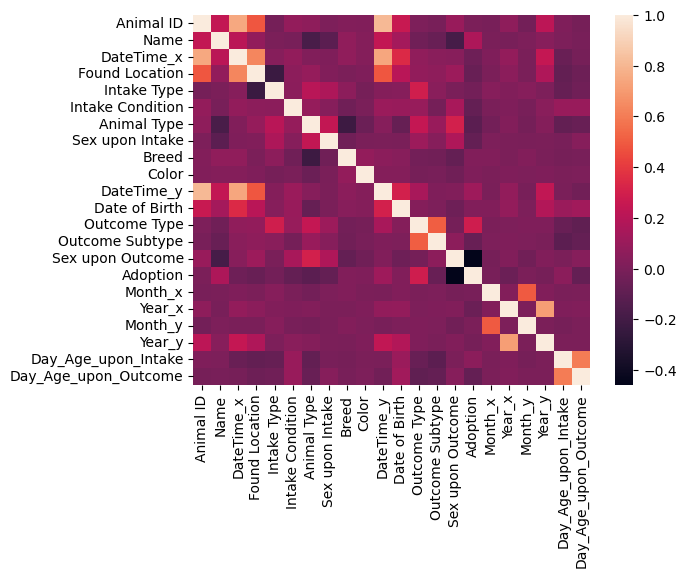

In [28]:
# Plot the heat map for the correlation matrix
corr = df.apply(lambda x: x.factorize()[0]).corr()

sns.heatmap(corr)
# corr.style.background_gradient(cmap='coolwarm')

Adoption                1.000000
Outcome Type            0.286545
Name                    0.168407
DateTime_y              0.113778
Day_Age_upon_Intake     0.053507
Breed                   0.019383
Date of Birth           0.019184
Color                   0.010470
Month_y                 0.002088
Animal ID               0.001638
Month_x                -0.012044
Year_y                 -0.014774
Intake Type            -0.025849
DateTime_x             -0.044174
Year_x                 -0.056697
Found Location         -0.065856
Outcome Subtype        -0.070324
Intake Condition       -0.079219
Sex upon Intake        -0.080090
Day_Age_upon_Outcome   -0.081667
Animal Type            -0.111102
Sex upon Outcome       -0.457506
Name: Adoption, dtype: float64


'\nNote: We observe that the attributes "Sex upon Outcome", "Name", "Sex upon Intake", "Age upon Outcome", "Intake Condition",\n"Found Location", "Age upon Intake", "DateTime_x", and "Year_x" are more correlated to the "Adoption" column than the \nother attributes.\n'

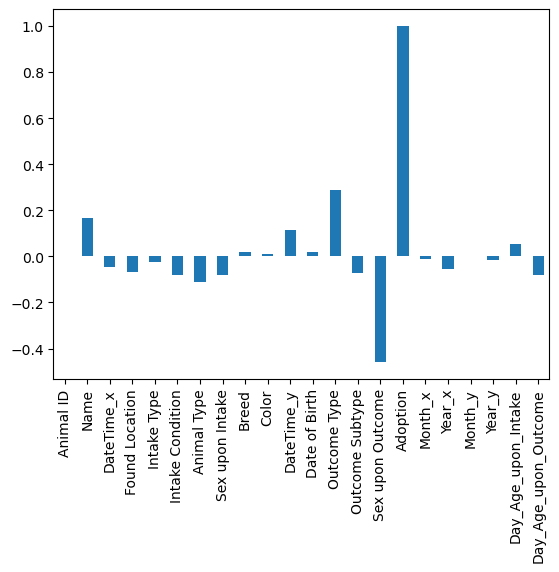

In [29]:
# Plot the correlation of all columns to the 'Adoption' column 

print(corr["Adoption"].sort_values(ascending=False))
corr["Adoption"].plot(kind="bar")

'''
Note: We observe that the attributes "Sex upon Outcome", "Name", "Sex upon Intake", "Age upon Outcome", "Intake Condition",
"Found Location", "Age upon Intake", "DateTime_x", and "Year_x" are more correlated to the "Adoption" column than the 
other attributes.
'''

In [30]:
df["Animal Type"].value_counts()

Animal Type
Cat          39633
Dog          35314
Other         6820
Bird           457
Livestock       19
Name: count, dtype: int64

In [31]:
# Let's create 2 different dataframes for cat and dogs to anaylze any correlations if present
df_cat = df[df["Animal Type"] == "Cat"]
df_dog = df[df["Animal Type"] == "Dog"]

Adoption                1.000000
Outcome Type            0.433778
Name                    0.244671
DateTime_y              0.159169
Intake Type             0.092061
Breed                   0.021583
Animal ID               0.019099
Date of Birth          -0.006863
Month_y                -0.009539
Color                  -0.009778
Year_y                 -0.018463
Day_Age_upon_Intake    -0.025884
DateTime_x             -0.030257
Month_x                -0.038035
Year_x                 -0.045165
Found Location         -0.052802
Outcome Subtype        -0.076128
Intake Condition       -0.084340
Sex upon Intake        -0.138838
Day_Age_upon_Outcome   -0.221395
Sex upon Outcome       -0.328099
Animal Type                  NaN
Name: Adoption, dtype: float64


<Axes: >

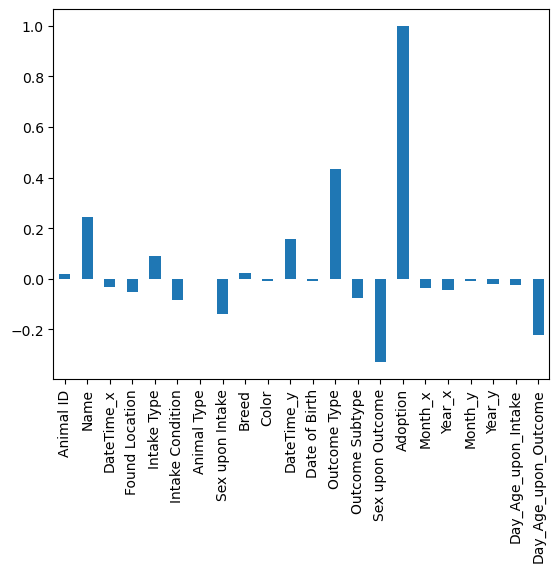

In [32]:
corr_cat = df_cat.apply(lambda x: x.factorize()[0]).corr()
print(corr_cat["Adoption"].sort_values(ascending=False))
corr_cat["Adoption"].plot(kind="bar")

Adoption                1.000000
Outcome Type            0.398837
Year_y                  0.103797
Day_Age_upon_Intake     0.102018
DateTime_y              0.090468
Name                    0.082731
Intake Type             0.043388
Outcome Subtype         0.026334
Breed                   0.007567
Date of Birth          -0.004113
Year_x                 -0.008327
Color                  -0.010114
Animal ID              -0.010591
Month_x                -0.014219
Sex upon Intake        -0.020733
Month_y                -0.022643
Intake Condition       -0.024648
Day_Age_upon_Outcome   -0.038080
DateTime_x             -0.043469
Found Location         -0.052391
Sex upon Outcome       -0.351451
Animal Type                  NaN
Name: Adoption, dtype: float64


<Axes: >

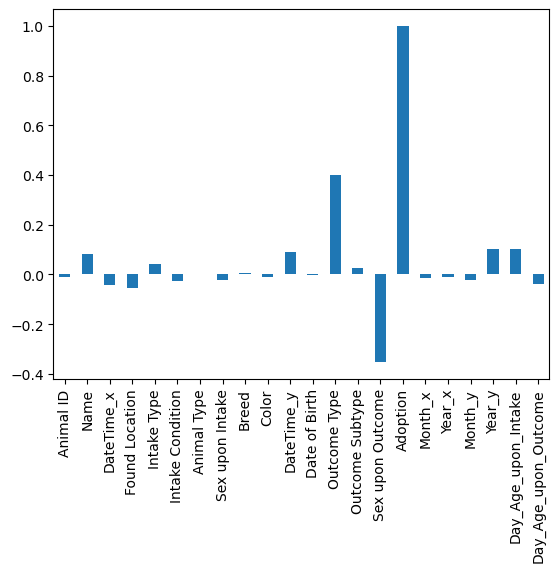

In [33]:
corr_dog = df_dog.apply(lambda x: x.factorize()[0]).corr()
print(corr_dog["Adoption"].sort_values(ascending=False))
corr_dog["Adoption"].plot(kind="bar")

### lll. Modeling
In this section, we filter and One-Hot encode columns to make them numerical. Then we use different modeling techniques to improve on accuracy.

In [34]:
# Let's create a new dataframe that contains attributes relevant for data modeling

# Dataframe 1 (df1) -> contains filtered out columns for data modeling
# Drop 'Outcome Type' column (we want to predict the values in the adoption column, which is derived from 'Outcome Type')

df1 = df.filter(['Name' , 'Breed', 'Color', 'Animal Type','Intake Type', 'Intake Condition',
                 'Sex upon Intake','Day_Age_upon_Intake', 'Month_x','Year_x', 'Sex upon Outcome',
                 'Day_Age_upon_Outcome', 'Month_y', 'Year_y', 'Adoption'])


df1.head()

,Name,Breed,Color,Animal Type,Intake Type,Intake Condition,Sex upon Intake,Day_Age_upon_Intake,Month_x,Year_x,Sex upon Outcome,Day_Age_upon_Outcome,Month_y,Year_y,Adoption
0,*Brock,Beagle Mix,Tricolor,Dog,Stray,Normal,Neutered Male,730.0,January,2019.0,Neutered Male,730.0,January,2019.0,No
1,Johnny Ringo,Domestic Shorthair,Orange Tabby,Cat,Public Assist,Normal,Neutered Male,730.0,May,2022.0,Neutered Male,730.0,May,2022.0,No
2,No Name,Domestic Shorthair,Cream Tabby,Cat,Stray,Normal,Intact Male,28.0,June,2020.0,Neutered Male,60.0,July,2020.0,Yes
3,*Casey,Domestic Shorthair Mix,Cream Tabby,Cat,Owner Surrender,Normal,Neutered Male,150.0,August,2016.0,Neutered Male,150.0,August,2016.0,No
4,*Casey,Domestic Shorthair Mix,Cream Tabby,Cat,Stray,Normal,Intact Male,120.0,July,2016.0,Neutered Male,150.0,August,2016.0,No


In [35]:
# corr = df1.apply(lambda x: x.factorize()[0]).corr()
# sns.heatmap(corr)
df1.shape

(82243, 15)

In [36]:
df1.describe(include='all')

,Name,Breed,Color,Animal Type,Intake Type,Intake Condition,Sex upon Intake,Day_Age_upon_Intake,Month_x,Year_x,Sex upon Outcome,Day_Age_upon_Outcome,Month_y,Year_y,Adoption
count,82243,82243,82243,82243,82243,82243,82243,82243.000000,82243,82243.000000,82243,82243.000000,82243,82243.000000,82243
unique,15575,1817,515,5,6,19,5,NaN,12,NaN,5,NaN,12,NaN,2
top,No Name,Domestic Shorthair Mix,Black/White,Cat,Stray,Normal,Intact Female,NaN,May,NaN,Neutered Male,NaN,June,NaN,No
freq,34972,21863,8129,39633,57055,64068,26959,NaN,9477,NaN,21253,NaN,8508,NaN,63004
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,641.270187,NaN,2017.922911,NaN,672.188381,NaN,2018.024501,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,991.984566,NaN,2.994294,NaN,1014.313251,NaN,3.014357,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2013.000000,NaN,0.000000,NaN,2013.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,2015.000000,NaN,60.000000,NaN,2015.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.000000,NaN,2018.000000,NaN,365.000000,NaN,2018.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,730.000000,NaN,2020.000000,NaN,730.000000,NaN,2020.000000,NaN


In [37]:
df1.head()

,Name,Breed,Color,Animal Type,Intake Type,Intake Condition,Sex upon Intake,Day_Age_upon_Intake,Month_x,Year_x,Sex upon Outcome,Day_Age_upon_Outcome,Month_y,Year_y,Adoption
0,*Brock,Beagle Mix,Tricolor,Dog,Stray,Normal,Neutered Male,730.0,January,2019.0,Neutered Male,730.0,January,2019.0,No
1,Johnny Ringo,Domestic Shorthair,Orange Tabby,Cat,Public Assist,Normal,Neutered Male,730.0,May,2022.0,Neutered Male,730.0,May,2022.0,No
2,No Name,Domestic Shorthair,Cream Tabby,Cat,Stray,Normal,Intact Male,28.0,June,2020.0,Neutered Male,60.0,July,2020.0,Yes
3,*Casey,Domestic Shorthair Mix,Cream Tabby,Cat,Owner Surrender,Normal,Neutered Male,150.0,August,2016.0,Neutered Male,150.0,August,2016.0,No
4,*Casey,Domestic Shorthair Mix,Cream Tabby,Cat,Stray,Normal,Intact Male,120.0,July,2016.0,Neutered Male,150.0,August,2016.0,No


#### One-Hot Encoding

In [38]:
# One Hot Encoding

# df2 -> is the dataframe containing the one-hot encoded data
df2 = df1

# For the "Name" column let's create a new numerical column where 0 = "No Name" and 1 = any other name.
def name_check(name):
    if(name == "No Name"):
        return 0
    else:
        return 1

df2["Named"] = df2["Name"].apply(name_check)
df2.drop(["Name"], axis =1, inplace = True)

# Drop the "Breed" column - it has too many unique values
df2.drop(['Breed'], axis =1, inplace = True)

# Keep the rows with the where the "Color" is one the top 20 frequent colors
# df1["Color"].value_counts().head(20).keys()
print(df2.shape)
df2 = df2.drop(df2[~df2['Color'].isin(['Black/White', 'Black', 'Brown Tabby', 'Brown', 'Brown Tabby/White',
       'Orange Tabby', 'White', 'Brown/White', 'White/Black', 'Blue/White',
       'Tan/White', 'Tortie', 'Blue', 'Tan', 'Calico', 'Blue Tabby',
       'Tricolor', 'Black/Brown', 'Brown/Black', 'White/Brown'])].index)
print(df2.shape)

# Make the "Adoption" column numerical so that 0 = Not Adopted and 1 = Adopted
def adopt_check(status):
    if(status == "Yes"):
        return 1
    else:
        return 0
df2["Adoption"] = df2["Adoption"].apply(adopt_check)
df2.reset_index(drop=True, inplace = True)
df2.head()

(82243, 14)
(57249, 14)


,Color,Animal Type,Intake Type,Intake Condition,Sex upon Intake,Day_Age_upon_Intake,Month_x,Year_x,Sex upon Outcome,Day_Age_upon_Outcome,Month_y,Year_y,Adoption,Named
0,Tricolor,Dog,Stray,Normal,Neutered Male,730.0,January,2019.0,Neutered Male,730.0,January,2019.0,0,1
1,Orange Tabby,Cat,Public Assist,Normal,Neutered Male,730.0,May,2022.0,Neutered Male,730.0,May,2022.0,0,1
2,Tricolor,Dog,Stray,Normal,Intact Female,730.0,February,2015.0,Spayed Female,730.0,May,2015.0,1,1
3,Black/White,Cat,Stray,Injured,Intact Female,28.0,June,2018.0,Intact Female,28.0,June,2018.0,0,0
4,Brown Tabby/White,Cat,Owner Surrender,Normal,Neutered Male,5110.0,November,2013.0,Neutered Male,5110.0,January,2014.0,1,1


In [39]:
df2.describe(include='all')

,Color,Animal Type,Intake Type,Intake Condition,Sex upon Intake,Day_Age_upon_Intake,Month_x,Year_x,Sex upon Outcome,Day_Age_upon_Outcome,Month_y,Year_y,Adoption,Named
count,57249,57249,57249,57249,57249,57249.000000,57249,57249.000000,57249,57249.000000,57249,57249.000000,57249.000000,57249.000000
unique,20,5,6,19,5,NaN,12,NaN,5,NaN,12,NaN,NaN,NaN
top,Black/White,Cat,Stray,Normal,Intact Female,NaN,May,NaN,Neutered Male,NaN,June,NaN,NaN,NaN
freq,8129,29824,40235,44945,18823,NaN,6611,NaN,14308,NaN,6053,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,614.470157,NaN,2017.926392,NaN,643.492253,NaN,2018.020909,0.231812,0.560394
std,NaN,NaN,NaN,NaN,NaN,974.857834,NaN,2.983341,NaN,994.747213,NaN,3.002689,0.421993,0.496343
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2013.000000,NaN,0.000000,NaN,2013.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,2015.000000,NaN,60.000000,NaN,2015.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,270.000000,NaN,2018.000000,NaN,300.000000,NaN,2018.000000,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,730.000000,NaN,2020.000000,NaN,730.000000,NaN,2020.000000,0.000000,1.000000


In [40]:
# One-Hot encode the rest of the columns
df2 = pd.get_dummies(df2, columns=['Color'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Animal Type'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Intake Type'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Intake Condition'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Sex upon Intake'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Month_x'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Sex upon Outcome'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['Month_y'], drop_first=True)

print(df2.shape)
df2.head()

(57249, 82)


,Day_Age_upon_Intake,Year_x,Day_Age_upon_Outcome,Year_y,Adoption,Named,Color_Black/Brown,Color_Black/White,Color_Blue,Color_Blue Tabby,...,Month_y_December,Month_y_February,Month_y_January,Month_y_July,Month_y_June,Month_y_March,Month_y_May,Month_y_November,Month_y_October,Month_y_September
0,730.0,2019.0,730.0,2019.0,0,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,730.0,2022.0,730.0,2022.0,0,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,730.0,2015.0,730.0,2015.0,1,1,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,28.0,2018.0,28.0,2018.0,0,0,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,5110.0,2013.0,5110.0,2014.0,1,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


#### Running models

In [41]:
# Decision Tree Classifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = df2.drop(['Adoption'],axis=1)
labels = df2["Adoption"]
x_train, x_test, y_train, y_test, = train_test_split(features, labels, random_state=8, test_size=0.2)
print ('Number of records in Training set :', len(x_train))
print ('Number of records in Test set     :', len(x_test))

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)

pred_val = clf.predict(x_test)
acc = accuracy_score(y_test, pred_val)

print("Accuracy of Decision tree classifier : ", acc)

Number of records in Training set : 45799
Number of records in Test set     : 11450
Accuracy of Decision tree classifier :  0.8937117903930131


In [42]:
# Create seperate dataframes for cats, dogs, and other animal types
df2_cat = df2[df2["Animal Type_Cat"] == True]
df2_dog = df2[df2["Animal Type_Dog"] == True]
df2_other = df2[(df2["Animal Type_Dog"] == False) & (df2["Animal Type_Cat"] == False)]

In [43]:
# Decision Tree Classifier on df2_cat, df2_dog, and df2_other dataframes

# Cat dataframe
features_cat = df2_cat.drop(['Adoption'],axis=1)
labels_cat = df2_cat["Adoption"]
x_train, x_test, y_train, y_test, = train_test_split(features_cat, labels_cat, random_state=8, test_size=0.2)
print ('Number of records in Training set :', len(x_train))
print ('Number of records in Test set     :', len(x_test))
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)
pred_val = clf.predict(x_test)
acc = accuracy_score(y_test, pred_val)
print("Accuracy of Decision tree classifier for the Cat dataframe: ", acc)

# Dog dataframe
features_dog = df2_dog.drop(['Adoption'],axis=1)
labels_dog = df2_dog["Adoption"]
x_train, x_test, y_train, y_test, = train_test_split(features_dog, labels_dog, random_state=8, test_size=0.2)
print ('Number of records in Training set :', len(x_train))
print ('Number of records in Test set     :', len(x_test))
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)
pred_val = clf.predict(x_test)
acc = accuracy_score(y_test, pred_val)
print("Accuracy of Decision tree classifier for the Dog dataframe: ", acc)

# Other animal type dataframe
features_other = df2_other.drop(['Adoption'],axis=1)
labels_other = df2_other["Adoption"]
x_train, x_test, y_train, y_test, = train_test_split(features_other, labels_other, random_state=8, test_size=0.2)
print ('Number of records in Training set :', len(x_train))
print ('Number of records in Test set     :', len(x_test))
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(x_train, y_train)
pred_val = clf.predict(x_test)
acc = accuracy_score(y_test, pred_val)
print("Accuracy of Decision tree classifier for the Other dataframe: ", acc)

Number of records in Training set : 23859
Number of records in Test set     : 5965
Accuracy of Decision tree classifier for the Cat dataframe:  0.9297569153394803
Number of records in Training set : 17964
Number of records in Test set     : 4491
Accuracy of Decision tree classifier for the Dog dataframe:  0.8305499888666221
Number of records in Training set : 3976
Number of records in Test set     : 994
Accuracy of Decision tree classifier for the Other dataframe:  0.9808853118712274


In [44]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
scores = cross_val_score(reg, features, labels, cv=10)
print('R^2 of Linear Regression (whole dataframe):', np.mean(scores))
scores = cross_val_score(reg, features_cat, labels_cat, cv=10)
print('R^2 of Linear Regression (Cat dataframe):', np.mean(scores))
scores = cross_val_score(reg, features_dog, labels_dog, cv=10)
print('R^2 of Linear Regression (Dog dataframe):', np.mean(scores))
scores = cross_val_score(reg, features_other, labels_other, cv=10)
print('R^2 of Linear Regression (Other Animals dataframe):', np.mean(scores))

R^2 of Linear Regression (whole dataframe): 0.4179173024440326
R^2 of Linear Regression (Cat dataframe): 0.5720184859768237
R^2 of Linear Regression (Dog dataframe): 0.25405290143414944
R^2 of Linear Regression (Other Animals dataframe): 0.27941797755706066


In [45]:
# KNN Classifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()
pca = PCA()
neigh = KNeighborsClassifier(n_neighbors=7)

pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('knn', neigh)
])

score = cross_val_score(pipeline,  X=features, y=labels, cv = 5)
print("Accuracy (whole dataframe): ", np.mean(score))
score = cross_val_score(pipeline,  X=features_cat, y=labels_cat, cv = 5)
print("Accuracy (Cat dataframe): ", np.mean(score))
score = cross_val_score(pipeline,  X=features_dog, y=labels_dog, cv = 5)
print("Accuracy (Dog dataframe): ", np.mean(score))
score = cross_val_score(pipeline,  X=features_other, y=labels_other, cv = 5)
print("Accuracy (Other Animals dataframe): ", np.mean(score))

Accuracy (whole dataframe):  0.8566790791591036
Accuracy (Cat dataframe):  0.9024279850660262
Accuracy (Dog dataframe):  0.7794255177020709
Accuracy (Other Animals dataframe):  0.9750503018108653


In [46]:
# Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

clf = GaussianNB()

predictions = cross_val_predict(clf,  X=features, y=labels, cv = 10)
print("Confusion Matrix: ")
print(confusion_matrix(labels, predictions))
print()
print("Classification report:  ")
print(classification_report(labels, predictions))
print("Accuracy (whole dataframe): ", accuracy_score(labels, predictions))

predictions_cat = cross_val_predict(clf,  X=features_cat, y=labels_cat, cv = 10)
print("Accuracy (Cat dataframe): ", accuracy_score(labels_cat, predictions_cat))
predictions_dog = cross_val_predict(clf,  X=features_dog, y=labels_dog, cv = 10)
print("Accuracy (Dog dataframe): ", accuracy_score(labels_dog, predictions_dog))
predictions_other = cross_val_predict(clf,  X=features_other, y=labels_other, cv = 10)
print("Accuracy (Other dataframe): ", accuracy_score(labels_other, predictions_other))

Confusion Matrix: 
[[21613 22365]
 [  783 12488]]

Classification report:  
              precision    recall  f1-score   support

           0       0.97      0.49      0.65     43978
           1       0.36      0.94      0.52     13271

    accuracy                           0.60     57249
   macro avg       0.66      0.72      0.59     57249
weighted avg       0.82      0.60      0.62     57249

Accuracy (whole dataframe):  0.5956610595818268
Accuracy (Cat dataframe):  0.6218481759656652
Accuracy (Dog dataframe):  0.5570251614339791
Accuracy (Other dataframe):  0.8704225352112676


In [102]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random_forest_clf = RandomForestClassifier()
params = {
    'max_depth': [i for i in range(35, 46, 1)],
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2']
}
gridSearch = GridSearchCV(random_forest_clf, params, cv = 5, verbose=2)
score = cross_val_score(gridSearch, X=features, y=labels, cv = 5)
print("Accuracy of model (whole dataframe): ", np.mean(score))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=8; total time=   4.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=8; total time=   4.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=12; total time=   3.1s
[CV] END max_depth=35, max_features=sqrt,

[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.2s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=38

[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=12; total time=   2.9s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=12; total time=   3.0s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=12; total time=   2.6s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=12; total time=   3.0s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=8; total time=   3.9s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=

[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=10; total time=   3.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=10; total time=   3.7s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=12; total time=   3.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=

[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=12; total time=   3.2s
[CV] END max_depth=37, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=8; total time=   2.6s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=8; total time=   2.6s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=8; total time=   3.2s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=10; total time=   2.6s
[CV] END max_depth=37, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=37

[CV] END max_depth=40, max_features=log2, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=12; total time=   2.6s
[CV] END max_depth=40, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=41

[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=10; total time=   3.8s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=10; total time=   3.7s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=12; total time=   3.9s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=12; total time=   3.8s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=44, max_features=sqrt, min_samples_leaf=12; total time=   3.9s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth

[CV] END max_depth=36, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=8; total time=   2.6s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=10; total time=   3.0s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=10; total time=   3.1s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=10; total time=   3.0s
[CV] END max_depth=36, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=36

[CV] END max_depth=39, max_features=log2, min_samples_leaf=12; total time=   2.9s
[CV] END max_depth=39, max_features=log2, min_samples_leaf=12; total time=   3.1s
[CV] END max_depth=39, max_features=log2, min_samples_leaf=12; total time=   2.6s
[CV] END max_depth=39, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=39, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=8; total time=   4.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=40

[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=12; total time=   3.8s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=12; total time=   3.5s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=12; total time=   3.5s
[CV] END max_depth=43, max_features=sqrt, min_samples_leaf=12; total time=   3.5s
[CV] END max_depth=43, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=43, max_features=log2, min_samples_leaf=8; total time=   2.6s
[CV] END max_depth=43, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=

[CV] END max_depth=35, max_features=log2, min_samples_leaf=8; total time=   3.1s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=10; total time=   3.1s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=10; total time=   3.1s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=10; total time=   3.2s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=10; total time=   3.0s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=12; total time=   2.9s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=12; total time=   2.6s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=3

[CV] END max_depth=38, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=38, max_features=log2, min_samples_leaf=12; total time=   2.9s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=8; total time=   3.4s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=8; total time=   3.5s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=10; total time=   3.2s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=10; total time=   3.3s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=39, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=39

[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=10; total time=   3.7s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=12; total time=   3.5s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=12; total time=   3.3s
[CV] END max_depth=42, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=42, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=42, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=42, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=42, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth=42, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=42

[CV] END max_depth=45, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=10; total time=   3.2s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=10; total time=   3.0s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=10; total time=   3.1s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=12; total time=   2.9s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=12; total time=   3.0s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=12; total time=   2.7s
Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] END max_depth=35, max_features=s

[CV] END max_depth=37, max_features=log2, min_samples_leaf=12; total time=   2.6s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=8; total time=   3.6s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=8; total time=   3.7s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=8; total time=   3.9s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10; total time=   3.4s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10; total time=   3.6s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=10; total time=   3.5s
[CV] END max_depth=38, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=38

[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=12; total time=   3.6s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=41, max_features=sqrt, min_samples_leaf=12; total time=   3.4s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=8; total time=   3.0s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=8; total time=   2.9s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=8; total time=   2.7s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=8; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=41, max_features=log2, min_samples_leaf=10; total time=   2.9s
[CV] END max_depth=41

[CV] END max_depth=44, max_features=log2, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=10; total time=   2.6s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=10; total time=   2.8s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=10; total time=   2.7s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=12; total time=   2.8s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=44, max_features=log2, min_samples_leaf=12; total time=   2.7s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.4s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_leaf=8; total time=   3.4s
[CV] END max_depth=

In [48]:
# Finding the best value for each parameter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
random_forest_clf = RandomForestClassifier()
params = {
    'max_depth': [i for i in range(35, 46, 1)],
    'min_samples_leaf': [8, 10, 12],
    'max_features': ['sqrt', 'log2']
}
gridSearch_x = GridSearchCV(random_forest_clf, params, cv = 5, verbose=1)
final_model = gridSearch_x.fit(X= features.values, y=labels.values)
best_params = final_model.best_params_
print("Best value for each parameter: ", best_params)
# score = cross_val_score(gridSearch_x, X=features, y=labels, cv = 5)
# print("Accuracy of model: ", np.mean(score))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Best value for each parameter:  {'max_depth': 42, 'max_features': 'sqrt', 'min_samples_leaf': 8}


In [49]:
# Checking to see if using the best params changes the accuracy of the model
params = {
    'max_depth': [i for i in range(42, 43, 1)],
    'min_samples_leaf': [8],
    'max_features': ['sqrt']
}
gridSearch_y = GridSearchCV(random_forest_clf, params, cv = 5, verbose=1)
score = cross_val_score(gridSearch_y, X=features, y=labels, cv = 5)
print("Accuracy of model: ", np.mean(score))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Accuracy of model:  0.9012040471107676


In [50]:
# Checking accuracy on cat, dog and other animals dfs
score = cross_val_score(gridSearch_x, X=features, y=labels, cv = 5)
print("Accuracy of model (whole dataframe): ", np.mean(score))
score = cross_val_score(gridSearch_x, X=features_cat, y=labels_cat, cv = 5)
print("Accuracy of model (Cat dataframe): ", np.mean(score))
score = cross_val_score(gridSearch_x, X=features_dog, y=labels_dog, cv = 5)
print("Accuracy of model (Dog dataframe): ", np.mean(score))
score = cross_val_score(gridSearch_x, X=features_other, y=labels_other, cv = 5)
print("Accuracy of model (Other dataframe): ", np.mean(score))

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Accuracy of model (whole dataframe):  0.9013088414502745
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Accuracy of model (Cat dataframe):  0.9389089608902367
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for each of 66 candidates, totalling 330 fits
Fitting 5 folds for 

#### Summary of accuracy on models
The model that performed the best for the whole dataframe was the Random Forest Classifier (RFC) with an accuracy of 90.12%, closely followed by the Decision Tree classifier with an accuracy of 89.37%. On the testing with the dataframes specified by Animal type, it was found that the best model for the Cat only dataframe was the RFC (accuracy 93.89%) followed by the DTC at 92.97%. The best model for the Dog only dataframe was the RTC (accuracy 83.39 %) followed by the DTC at 83.05% %. Finally, the best model for the other animal types dataframe was the DTC with an accuracy of 98.08 % followed the KNN classifier at 97.50%.

###### Decision Tree Classifier (DTC)

Accuracy of Decision tree classifier for the whole dataframe :  0.8937117903930131\
Accuracy of Decision tree classifier for the Cat dataframe:  0.9297569153394803\
Accuracy of Decision tree classifier for the Dog dataframe:  0.8305499888666221\
Accuracy of Decision tree classifier for the Other dataframe:  0.9808853118712274\

###### Linear Regression

R^2 of Linear Regression (whole dataframe): 0.4179173024440326\
R^2 of Linear Regression (Cat dataframe): 0.5720184859768237\
R^2 of Linear Regression (Dog dataframe): 0.25405290143414944\
R^2 of Linear Regression (Other Animals dataframe): 0.27941797755706066\

###### KNN Classifier

Accuracy (whole dataframe):  0.8566790791591036\
Accuracy (Cat dataframe):  0.9024279850660262\
Accuracy (Dog dataframe):  0.7794255177020709\
Accuracy (Other Animals dataframe):  0.9750503018108653\

###### Naive Bayes Classifier

Accuracy (whole dataframe):  0.5956610595818268\
Accuracy (Cat dataframe):  0.6218481759656652\
Accuracy (Dog dataframe):  0.5570251614339791\
Accuracy (Other dataframe):  0.8704225352112676\

###### Random Forest Classifier (RFC)

Accuracy of model (whole dataframe):  0.9008022988602196\
Accuracy of model (using best parameters) :  0.9012040471107676\
Accuracy of model (Cat dataframe):  0.9389089608902367
Accuracy of model (Dog dataframe):  0.8339345357381429
Accuracy of model (Other dataframe):  0.9734406438631791


#### Testing some other models (not working ones)

In [ ]:
# Support Vector Machines

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

scaler = StandardScaler()
pca = PCA()
svc = SVC()

pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca),
    ('svc', svc)
])

param_grid =  {
    
    'pca__n_components': list(range(5, 10)),
    'svc__kernel': ['linear', 'poly', 'rbf']
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv = 5, verbose=2)
predictions = cross_val_predict(grid_search_clf,  X=features, y=labels, cv = 10)
print("Confusion Matrix: ")
print(confusion_matrix(labels, predictions))
print()
print("Classification report:  ")
print(classification_report(labels, predictions))

print("Accuracy of model: ", accuracy_score(labels, predictions))

In [ ]:
# Neural Nets Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Pipeline the data
scaler = StandardScaler()
nn = MLPClassifier(hidden_layer_sizes=30, solver='adam', learning_rate_init=0.005)
pipe = Pipeline(steps=[('scaler', scaler), 
                      ('mlp', nn)])
# param_grid = {
#     'mlp__activation': ['logistic', 'tanh', 'relu']
# }
param_grid = {
            'mlp_activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),
                (18,),(19,),(20,),(21,)]
        }
       

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(features, labels)

# 5-fold cross validation
cv_scores = cross_val_score(grid_search, features, labels, cv=5)
print("Accuracy of Neural Nets MLP Classifier:", str(cv_scores.mean() * 100) + "%")

In [ ]:
# Neural Nets Classifier

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Pipeline the data
scaler = StandardScaler()
nn = MLPClassifier(hidden_layer_sizes=(15,), solver='adam', learning_rate_init=0.001, max_iter=100, verbose=True)

pipe = Pipeline(steps=[('scaler', scaler), ('mlp', nn)])

# Define the parameter grid
param_grid = {
    'mlp__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    'mlp__hidden_layer_sizes': [(5,), (10,), (15,), (20,), (25,), (30,)]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(features, labels)

# 5-fold cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, features, labels, cv=5)
print("Accuracy of Neural Nets MLP Classifier:", str(cv_scores.mean() * 100) + "%")

In [ ]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.datasets import make_classification
# from sklearn.model_selection import train_test_split
# X, y = make_classification(n_samples=100, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify=y,
#                                                     random_state=1)
# clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
# clf.predict_proba(X_test[:1])
# clf.predict(X_test[:5, :])
# clf.score(X_test, y_test)


In [ ]:
# Neural Networks
from sklearn.neural_network import MLPClassifier
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings (category=ConvergenceWarning)
def run_nn():
    
    mlp_clf = MLPClassifier()
    pipeline = Pipeline([
        ('scaler', scaler),
        ('mlp', mlp_clf)
    ])
    param_grid = {
        'mlp__hidden_layer_sizes': [(i,) for i in range(30, 61, 10)],
        'mlp__activation': ['logistic', 'tanh', 'relu']
    }

    grid_search_mlp = GridSearchCV(pipeline, param_grid, cv = 5)
    score = cross_val_score(grid_search_mlp,  X=features, y=labels, cv = 5)

    print("Accuracy of model: ", np.mean(score))
    
run_nn()